In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## Our Data

We have some made up data that shows test scores related to the hours of sleep for each student. Let's plot the data to get an idea of what it looks like.

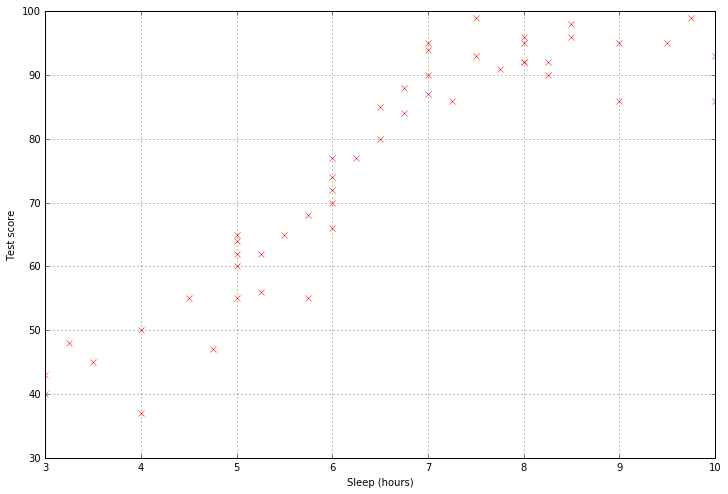

In [97]:
data = np.loadtxt('data.csv', delimiter=',')
x = data[:,0]
y = data[:,1]

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
ax.plot(x, y, 'x', linewidth=4, color='red')
ax.set_xlabel('Sleep (hours)')
ax.set_ylabel('Test score')

ax.grid()

plt.show()


## Can we guess a linear function for this data?

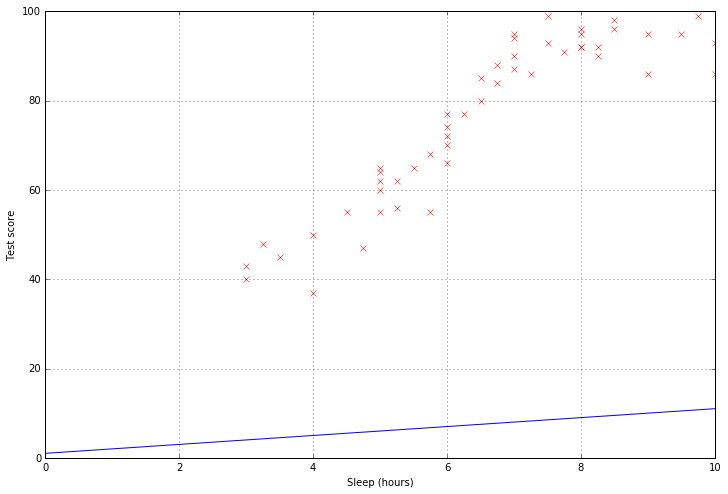

In [98]:
fig = plt.figure(figsize=(12,8))

# Plot the data
data = np.loadtxt('data.csv', delimiter=',')
x = data[:,0]
y = data[:,1]
ax = fig.add_subplot(111)
ax.plot(x, y, 'x', linewidth=4, color='red')
ax.set_xlabel('Sleep (hours)')
ax.set_ylabel('Test score')

# Guess a line
x1 = np.linspace(0,10, 10)
def y1(x):
    m = 1 # Guess a slope
    b = 1 # Guess a y-intercept
    return m * x + b
ax.plot(x1, y1(x1), color='blue')

ax.grid()
plt.show()


## Figuring Out the Best Line

Let's devise a method to find the best line through the data...

First some Machine Learning vocabulary:

### Features

We refer to X as our feature vector.

### Hypothesis Function

$\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x$

### Cost Function

$(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2  = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2$

$m$ is the number of training examples we have in our data set.

This is also called the "mean squared error" function. It tells us how far off our ~~guess~~ hypothesis is. For each data point $(x,y)$, we get what the hypotheis predicts for $y$ or $h_\theta(x)$, subtract the actual $y$ value, square the difference, then sum all the differences.

## Plotting the Cost Function

Let's plot the cost function for a range of $\theta_0$ and $\theta_1$ values...

In [99]:
def hypothesis(theta,X):
    return np.dot(X,theta)

def computeCost(theta_start,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    return float((1./(2*m)) * np.dot((hypothesis(theta_start,X)-y).T,(hypothesis(theta_start,X)-y)))

data = np.loadtxt('data.csv', delimiter=',')

X = data[:,[0]]
y = data[:,[1]]
m = y.size # Number of training examples
X = np.insert(X,0,1,axis=1)

# theta is a vector with n rows and 1 columns (if X has n features)
theta = np.zeros((X.shape[1],1))

print('For theta:\n {0}'.format(theta))
print('The cost is: {0}'.format(computeCost(theta,X,y)))



For theta:
 [[ 0.]
 [ 0.]]
The cost is: 3042.26


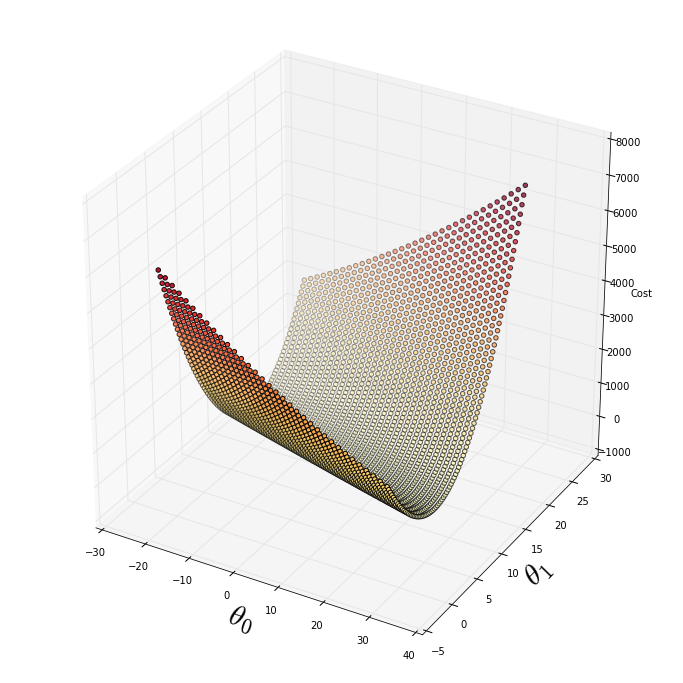

In [100]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-20,30,1.5)
yvals = np.arange(-2,25,.3)
x_plot, y_plot, z_plot = [], [], []
for x_val in xvals:
    for y_val in yvals:
        x_plot.append(x_val)
        y_plot.append(y_val)
        cost = computeCost(np.array([[x_val], [y_val]]),X,y)
        z_plot.append(cost)
        
plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)

ax.set_zlabel('Cost')

scat = ax.scatter(x_plot, y_plot, z_plot, c=np.abs(z_plot), cmap=plt.get_cmap('YlOrRd'))
plt.show()

## Gradient Descent

We walk down the slope until we get to the bottom.

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$

* $\alpha$ is the learning rate (the size of our step)
* $j$ is the feature index e.g. $\theta_0$ and $\theta_1$
* The direction we walk is the derivative

For our cost function this is:

$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i})$

$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right)$

In [101]:
def descendGradient(X, iterations, alpha, theta_start = np.zeros(2)):
    """
    theta_start is an n-dimensional vector of initial theta guess
    X is matrix with n-columns and m-rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for _ in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

In [102]:
#Actually run gradient descent to get the best-fit theta values
iterations = 1500
alpha = 0.01
initial_theta = np.zeros((X.shape[1],1))
learned_theta, thetahistory, jvec = descendGradient(X, iterations, alpha, initial_theta)

print('Best choice for theta is:\n {0}'.format(learned_theta))

Best choice for theta is:
 [[ 11.21296159]
 [  9.85140876]]


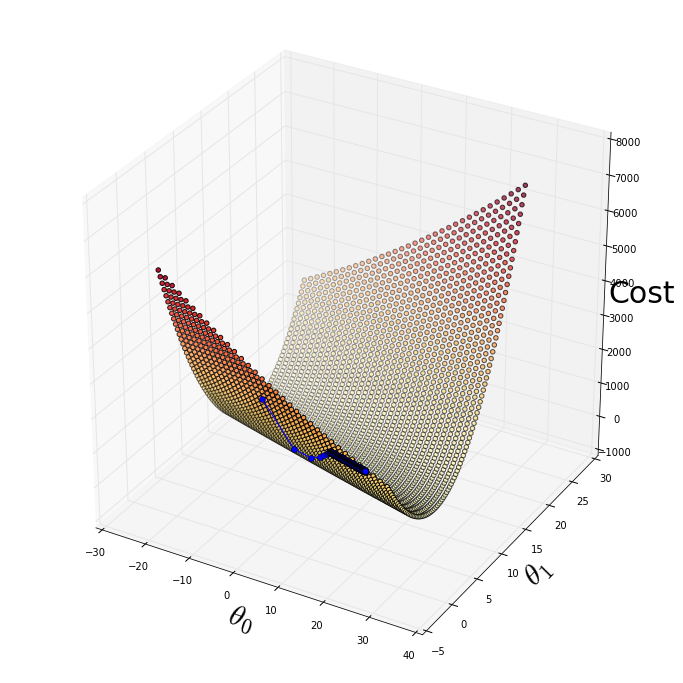

In [104]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-20,30,1.5)
yvals = np.arange(-2,25,.3)
x_plot, y_plot, z_plot = [], [], []
for x_val in xvals:
    for y_val in yvals:
        x_plot.append(x_val)
        y_plot.append(y_val)
        cost = computeCost(np.array([[x_val], [y_val]]),X,y)
        z_plot.append(cost)
        
plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
ax.set_zlabel('Cost', fontsize=30)

scat = ax.scatter(x_plot, y_plot, z_plot, c=np.abs(z_plot), cmap=plt.get_cmap('YlOrRd'))

# We now add the path of gradient descent
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()

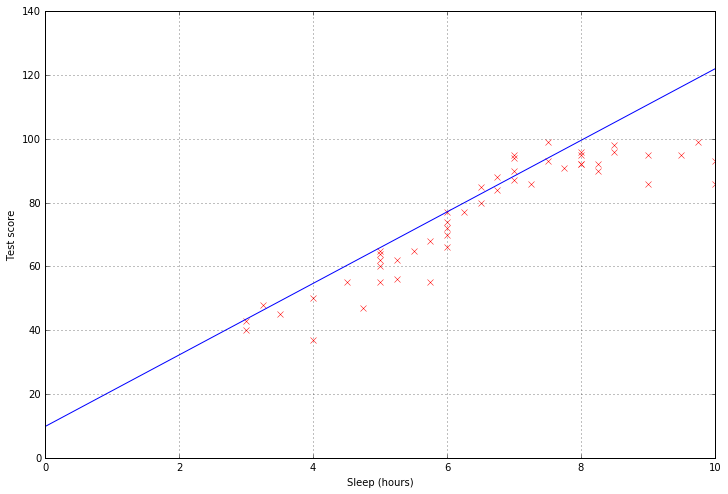

In [105]:
data = np.loadtxt('data.csv', delimiter=',')
x = data[:,0]
y = data[:,1]

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
ax.plot(x, y, 'x', linewidth=4, color='red')
ax.set_xlabel('Sleep (hours)')
ax.set_ylabel('Test score')

ax.grid()

# Now plot our learned line
x1 = np.linspace(0,10, 10)
def y_learned(x):
    m = learned_theta[0][0] # theta 0
    b = learned_theta[1][0] # theta 1   
    return m * x + b
ax.plot(x1, y_learned(x1), color='blue')


plt.show()